## Regression & Its Evaluation | Assignment

#### Q.1) What is Simple Linear Regression?


Answer ->

Simple Linear Regression attempt to determine the strength and characteristics of a relationship between one independent variable (x) and another dependent variable (y).

#### Q.2) What are the key assumptions of Simple Linear Regression?


Answer ->

* 1. Linearity 
* 2. Independence
* 3. Homoscedasticity
* 4. Normality of Errors
* 5. Multicollinearity

#### Q.3) What is heteroscedasticity, and why is it important to address in regression models?

Answer ->

Heteroscedasticity known as a non-constant variance, it is important in regression models because its data points having a pattern to recognize the pattern and learn through it.

#### Q.4)  What is Multiple Linear Regression?


Answer ->

Multiple Linear Regression means there is only one dependent variable and having more then one independent variable (features).

#### Q.5) What is polynomial regression, and how does it differ from linear regression?


Answer ->

In polynomial regression there is one dependent variable and another independent variable with non-linear relationship, in linear regression there is linear relationship and in polynomial regression there is non-linear relationship. 

#### Q.6) Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.


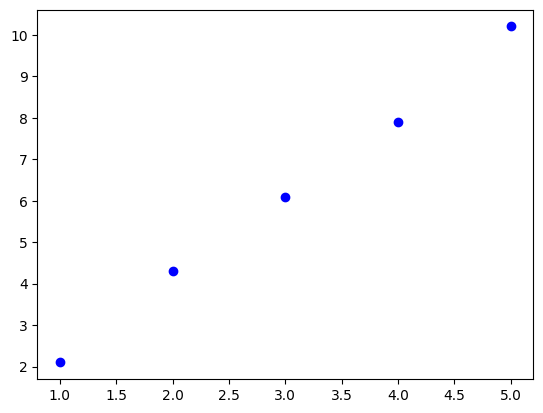

In [2]:
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

import matplotlib.pyplot as plt
import numpy as np
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
Y_pred

plt.scatter(X, Y, color='blue')
plt.plot(X_test, Y_pred, color='red')


#### Q.7)  Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.


In [3]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# Data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X, y)

print("Intercept:", lr_multi.intercept_)
print("Coefficients:", dict(zip(X.columns, lr_multi.coef_)))
print("R^2:", lr_multi.score(X, y))

# Compute VIF
X_const = sm.add_constant(X)
vif = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]
})
print("\nVIF results:")
print(vif)

Intercept: 103157.89473684214
Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}
R^2: 0.9985775248933144

VIF results:
  feature       VIF
0    Area  7.736842
1   Rooms  7.736842


#### Q.8) Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

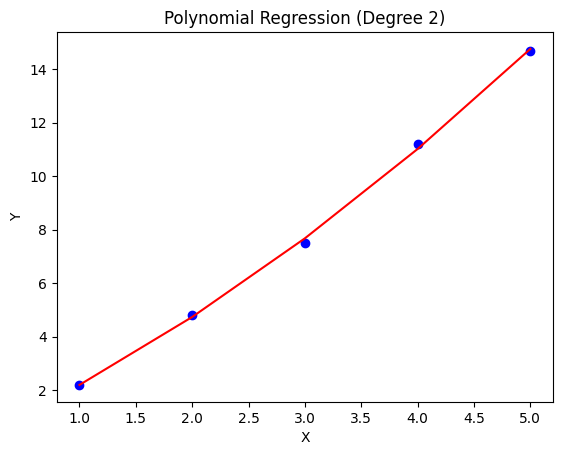

In [4]:
import numpy as np
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
# Fit 2nd-degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1, 1))
from sklearn.linear_model import LinearRegression
lr_poly = LinearRegression()
lr_poly.fit(X_poly, Y)
Y_poly_pred = lr_poly.predict(X_poly)
# Plotting
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_poly_pred, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#### Q.9) Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.


In [ ]:
# Residuals plot and simple heteroscedasticity check for given data
X_new = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
y_new = np.array([15, 35, 40, 50, 65])

# Fit linear regression
lr_res = LinearRegression()
lr_res.fit(X_new, y_new)
y_pred = lr_res.predict(X_new)

# Residuals
residuals = y_new - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='tab:blue')
plt.hlines(0, y_pred.min() - 1, y_pred.max() + 1, colors='red', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(alpha=0.3)
plt.show()

# Quick numeric check for heteroscedasticity: compare residual variance in lower vs upper half
n = len(residuals)
low_var = residuals[: n // 2].var(ddof=1)
high_var = residuals[n // 2 :].var(ddof=1)

print("Residuals:", np.round(residuals, 3))
print(f"Variance (lower half): {low_var:.4f}")
print(f"Variance (upper half): {high_var:.4f}")

if (high_var > 1.5 * low_var):
    print("Assessment: Residual spread increases with fitted values — evidence of heteroscedasticity.")
else:
    print("Assessment: No strong evidence of heteroscedasticity from this simple check.")

#### Q.10)  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Answer ->

As a data scientist in this scenario, detecting heteroscedasticity and multicollinearity is a critical step. These issues violate key assumptions of standard linear regression (like OLS), and failing to address them will lead to an unreliable model. My coefficients might be misleading, and my p-values and confidence intervals would be incorrect.Here is the systematic approach I would take to diagnose and resolve these issues for our house price model.1. Addressing MulticollinearityProblem: Multicollinearity (high correlation between area and number of rooms) inflates the variance of our coefficient estimates. This makes the model unstable; a small change in the data could drastically change the coefficients. It also makes it impossible to determine the individual impact of a single feature (e.g., "What's the effect of one extra room, holding area constant?"—which is a nonsensical question if they always move together).Steps:Diagnose with VIF: First, I'd confirm the severity by calculating the Variance Inflation Factor (VIF) for each predictor. A VIF greater than 5 or 10 is a common red flag. I strongly suspect the VIF for area and number of rooms will be high.Implement Solutions (Choose one or more):Feature Selection: The simplest fix is to remove one of the correlated variables. Which one? I'd lean towards keeping the one with the strongest theoretical and statistical relationship to price. In this case, area is likely the primary driver, so I would test a model without number of rooms and see if the VIFs drop and the model's explanatory power (Adjusted $R^2$) remains high.Feature Engineering: I could combine the features into a new, more meaningful one. For example, I might create area_per_room. However, this can sometimes make interpretation more difficult.Use Regularization (My preferred method): This is often the best solution. I would switch from a standard OLS regression to a Ridge Regression (L2 Regularization). Ridge regression is specifically designed to handle multicollinearity. It adds a small penalty term that shrinks the coefficients of correlated predictors, making the model far more stable and reliable without me having to manually remove features.2. Addressing HeteroscedasticityProblem: Heteroscedasticity (non-constant variance of errors) means our model's accuracy is not consistent. For house prices, this typically means the model is much worse at predicting expensive homes than cheap homes. The absolute error grows as the price increases. This violates the OLS assumption of homoscedasticity and, most importantly, invalidates our p-values and confidence intervals.Steps:Diagnose: I've already detected it, but I would confirm by:Visualizing: Plotting the residuals vs. fitted (predicted) values. I'd expect to see a "funnel" or "cone" shape, where the spread of the residuals (errors) increases as the predicted house price goes up.Testing: Running a formal statistical test like the Breusch-Pagan test or White's test to get a p-value confirming the presence of heteroscedasticity.Implement Solutions:Log-Transform the Target Variable (Most common fix): This is the standard approach for right-skewed data like house prices or income. Instead of predicting $price$, I would build a model to predict $\log(price)$. This transformation compresses the scale, pulling in the high-value homes and stabilizing the error variance. The funnel shape in the residual plot should disappear.Note: When using the model for predictions, I would just need to remember to take the exponent (e.g., $e^{prediction}$) to get the final price in dollars.Use Robust Standard Errors: If transformations don't fix the issue or are undesirable (e.g., they make the model harder to interpret), I can't fix the heteroscedasticity, but I can correct for its effect. I would use Huber-White robust standard errors (also called "sandwich estimators"). This doesn't change the coefficient estimates, but it does adjust the standard errors and p-values to be accurate, even in the presence of heteroscedasticity.3. Final Model ValidationMy work isn't done after applying these fixes. The final step is to create the new, robust model and re-validate everything.My plan would be:Build New Model: Create a Ridge Regression model.Use Transformed Target: Use $\log(price)$ as the dependent variable.Check Assumptions Again: After fitting this new model, I will re-plot the residuals and re-calculate VIFs.The VIFs should now be low (due to Ridge).The new residual plot ($\log(price)$ residuals vs. fitted) should show a random, uniform scatter of points with no funnel shape.The Breusch-Pagan test on the new model should now yield an insignificant p-value.By following these steps, I can be confident that my final model is not just accurate, but also stable, reliable, and interpretable, with trustworthy statistics.